<a href="https://colab.research.google.com/github/FrancLis/Multivariate-Time-Series-Forecasting/blob/main/2_Timeseries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series Analysis

In [1]:
!pip install kats
!pip install termocolor

ERROR: Could not find a version that satisfies the requirement termocolor (from versions: none)
ERROR: No matching distribution found for termocolor


In [2]:
import sys
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from termcolor import colored

In [3]:
plt.style.use('seaborn')

In [4]:
file = r"/content/PG.csv"
df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,1.710938,1.722656,1.708984,1.718750,0.399508,832000
1970-01-05,1.718750,1.730469,1.708984,1.726563,0.401324,518400
1970-01-06,1.722656,1.722656,1.707031,1.718750,0.399508,480000
1970-01-07,1.722656,1.750000,1.722656,1.746094,0.405864,710400
1970-01-08,1.746094,1.773438,1.742188,1.765625,0.410404,531200
...,...,...,...,...,...,...
2022-02-03,161.979996,164.979996,161.619995,164.139999,164.139999,10474500
2022-02-04,163.130005,164.490005,161.410004,161.529999,161.529999,8959900
2022-02-07,161.869995,162.259995,159.669998,160.320007,160.320007,6430500


As outlined previously, we must turn our series into a stationary process in order to model it. Therefore, let’s apply the Dickey-Fuller test to see if it is a stationary process:


# Analysis



**Stationarity** is a key part of time series analysis. Simply put, stationarity means that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. It not only makes modeling time series easier, but it is an underlying assumption in many time series methods. Specifically, stationarity is assumed for a wide variety of time series forecasting methods including autoregressive moving average (ARMA), ARIMA, and Seasonal ARIMA (SARIMA). If there is no stationarity in the data set, a change in present values will not cause a significant change in past values.

# Augmented Dickey-Fuller (ADF)



Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Next, let’s pass our data frame into the adfuller method. Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion:

In [5]:
from statsmodels.tsa.stattools import adfuller

columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for i in columns:
  adft = adfuller(df[i], autolag='AIC')
  print(colored(i , 'red'))
  output_df = pd.DataFrame({ 'Values':[adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , 
                          'Metric':['Test Statistics','p-value','No. of lags used','Number of observations used', 
                                    'critical value (1%)', 'critical value (5%)', 'critical value (10%)']})
  print(output_df)
  print('')

Open
         Values                       Metric
0      2.492793              Test Statistics
1      0.999047                      p-value
2     26.000000             No. of lags used
3  13118.000000  Number of observations used
4     -3.430849          critical value (1%)
5     -2.861760          critical value (5%)
6     -2.566887         critical value (10%)

High
         Values                       Metric
0      2.255893              Test Statistics
1      0.998925                      p-value
2     30.000000             No. of lags used
3  13114.000000  Number of observations used
4     -3.430849          critical value (1%)
5     -2.861760          critical value (5%)
6     -2.566887         critical value (10%)

Low
         Values                       Metric
0      2.440924              Test Statistics
1      0.999028                      p-value
2     26.000000             No. of lags used
3  13118.000000  Number of observations used
4     -3.430849          critical value

**Only the feature Volume is stationary**

# Box Cox Transformation

A log transformation has been used to convert the skewed distribution of the data to a less-skewed distribution/normal distribution

In [6]:
from sklearn.preprocessing import PowerTransformer

pt_endog = PowerTransformer(method='box-cox')
df_power_transformer = pt_endog.fit_transform(df.values)
df_power_transformer = pd.DataFrame(df_power_transformer, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

Let's pass the dataframe with the Power Transformer trasformation into the adfuller method

In [7]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for i in columns:
  adft = adfuller(df_power_transformer[i], autolag='AIC')
  print(colored(i + ' (PowerTransformer)', 'red'))
  output_df_power_transformer = pd.DataFrame({ 'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , 
                          'Metric':['Test Statistics','p-value','No. of lags used','Number of observations used', 
                                    'critical value (1%)', 'critical value (5%)', 'critical value (10%)']})
  print(output_df_power_transformer)
  print('')


Open (PowerTransformer)
         Values                       Metric
0     -0.076115              Test Statistics
1      0.951766                      p-value
2     30.000000             No. of lags used
3  13114.000000  Number of observations used
4     -3.430849          critical value (1%)
5     -2.861760          critical value (5%)
6     -2.566887         critical value (10%)

High (PowerTransformer)
         Values                       Metric
0     -0.072566              Test Statistics
1      0.952103                      p-value
2     20.000000             No. of lags used
3  13124.000000  Number of observations used
4     -3.430848          critical value (1%)
5     -2.861760          critical value (5%)
6     -2.566887         critical value (10%)

Low (PowerTransformer)
         Values                       Metric
0     -0.131952              Test Statistics
1      0.946161                      p-value
2      5.000000             No. of lags used
3  13139.000000  Number of 

We can see that only the **Volume** attribute is stationary


 


# Autocorrelation




Checking for autocorrelation in time series data is another important part of the analytic process. 

**Correlation**

Most important point about values in time series is its dependence on the previous values.
We can calculate the correlation for time series observations with previous time steps, called as lags.
Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called an autocorrelation.

To understand it better lets consider the example of fish prices. We will use below notation to represent the fish prices.
P(t)= Fish price of today
P(t-1) = Fish price of last month
P(t-2) =Fish price of last to last month
Time series of fish prices can be represented as P(t-n),..... P(t-3), P(t-2),P(t-1), P(t)
So if we have fish prices for last few months then it will be easy for us to predict the fish price for today (Here we are ignoring all other external factors that may affect the fish prices
All the past and future data points are related in time series and ACF and PACF functions help us to determine correlation in it.

**Auto Correlation Function (ACF)**

ACF tells you how correlated points are with each other, based on how many time steps they are separated by.
Now to understand it better lets consider above example of fish prices. Let's try to find the correlation between fish price for current month P(t) and two months ago P(t-2). Important thing to note that, fish price of two months ago can directly affect the today's fish price or it can indirectly affect the fish price through last months price P(t-1)
So ACF consider the direct as well indirect effect between the points while determining the correlation

**Partial Auto Correlation Function (PACF)**

Unlike ACF, PACF only consider the direct effect between the points while determining the correlation
In case of above fish price example PACF will determine the correlation between fish price for current month P(t) and two months ago P(t-2) by considering only P(t) and P(t-2) and ignoring P(t-1)

## ACF Plot

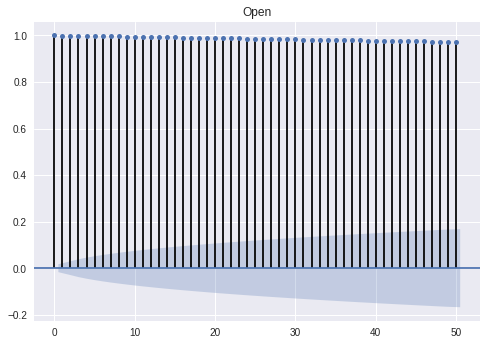

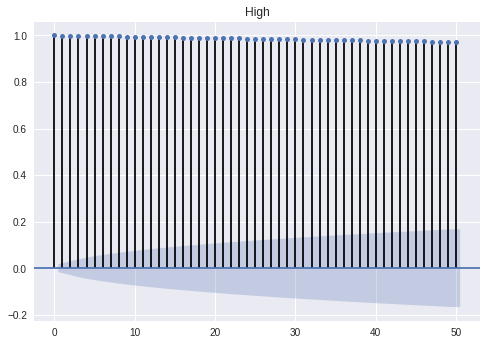

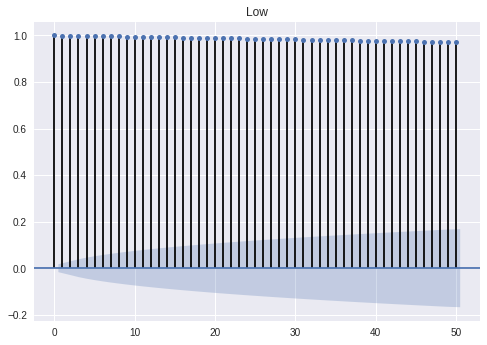

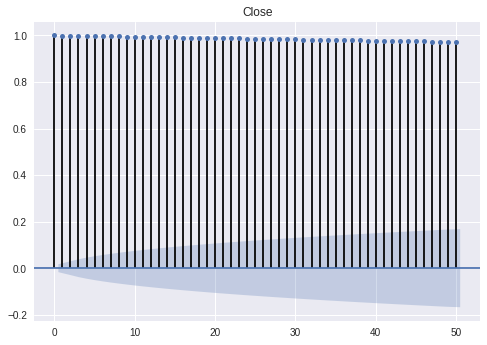

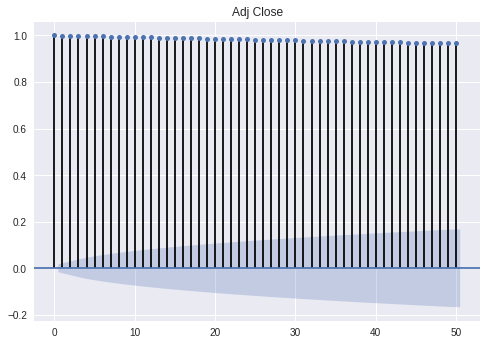

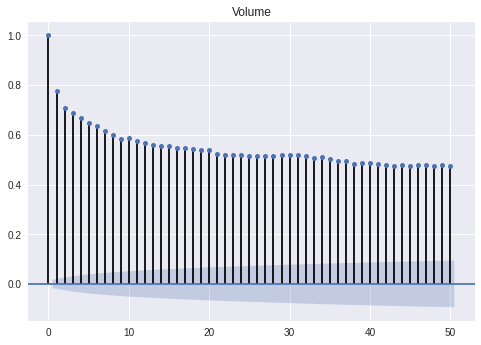

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for i in columns:
  plot_acf(df[i], lags=50, title=i)
  plt.show()
  print('')

Clearly, you see that this is not a stationary process, and it is hard to tell if there is some kind of seasonality.

We also see autocorrelation in the Volume's data even if are considered stationary 

# Time series Components

In a time series, the values of the variable(s) go up and down over time steps with the following components.

**Trend** - Trend is a consistent long-term upward or downward movement of the data values over a period of time. For example, increasing sales or profit over quarters.

**Seasonal Component** - Repetitive upward or downward movement from the trend that occurs within a calendar year such as seasons, quarters, months etc. One of the most popular examples is the gadgets sales spikes during festivals like Diwali, Christmas etc.

**Cyclical Component** - Fluctuation around the trend line, with time duration between repetitions of more than a year. Periodicity of cyclical fluctuations is not constant, unlike that of seasonal component. Examples are fluctuations in business metrics, due to recession, unemployment etc.

**Noise or Irregular Component** - Random uncorrelated changes that follow a normal distribution with mean value of zero and constant variance ( also called White noise ).

-------------------------------

**Time Series Decomposition**

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

**Level**: The average value in the series.
**Trend**: The increasing or decreasing value in the series.
**Seasonality**: The repeating short-term cycle in the series.
**Noise**: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:

Additive:  
y
(
t
)
=
L
e
v
e
l
+
T
r
e
n
d
+
S
e
a
s
o
n
a
l
i
t
y
+
N
o
i
s
e
 
Multiplicative:  
y
(
t
)
=
L
e
v
e
l
∗
T
r
e
n
d
∗
S
e
a
s
o
n
a
l
i
t
y
∗
N
o
i
s
e
 
**In this case we are going to use function seasonal_decompose() from the statsmodels library.**

    Parameters
    ----------
    x : array-like
        Time series. If 2d, individual series are in columns.
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If False, the filter coefficients are for past values only.
    extrapolate_trend : int or 'freq', optional
        If set to > 0, the trend resulting from the convolution is
        linear least-squares extrapolated on both ends (or the single one
        if two_sided is False) considering this many (+1) closest points.
        If set to 'freq', use `freq` closest points. Setting this parameter
        results in no NaN values in trend or resid components.

    Returns
    -------
    results : obj
        A object with seasonal, trend, and resid attributes.

    Notes
    -----
    This is a naive decomposition. More sophisticated methods should
    be preferred.

    The additive model is Y[t] = T[t] + S[t] + e[t]

    The multiplicative model is Y[t] = T[t] * S[t] * e[t]

    The seasonal component is first removed by applying a convolution
    filter to the data. The average of this smoothed series for each
    period is the returned seasonal component.

The multiplicative model was chosen since it seems there is exponential increase in the amplitudes over time.

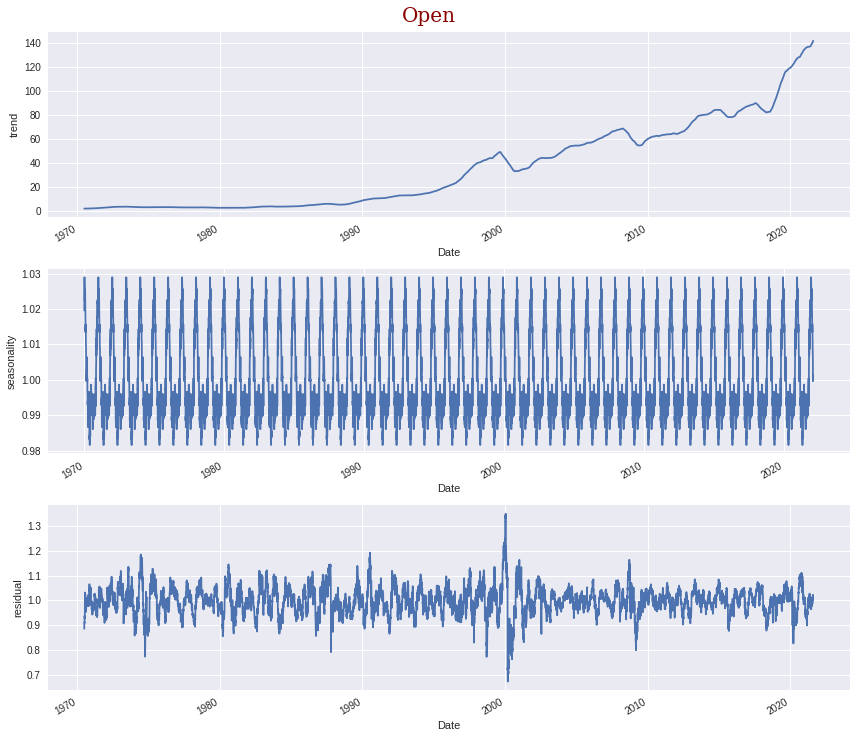

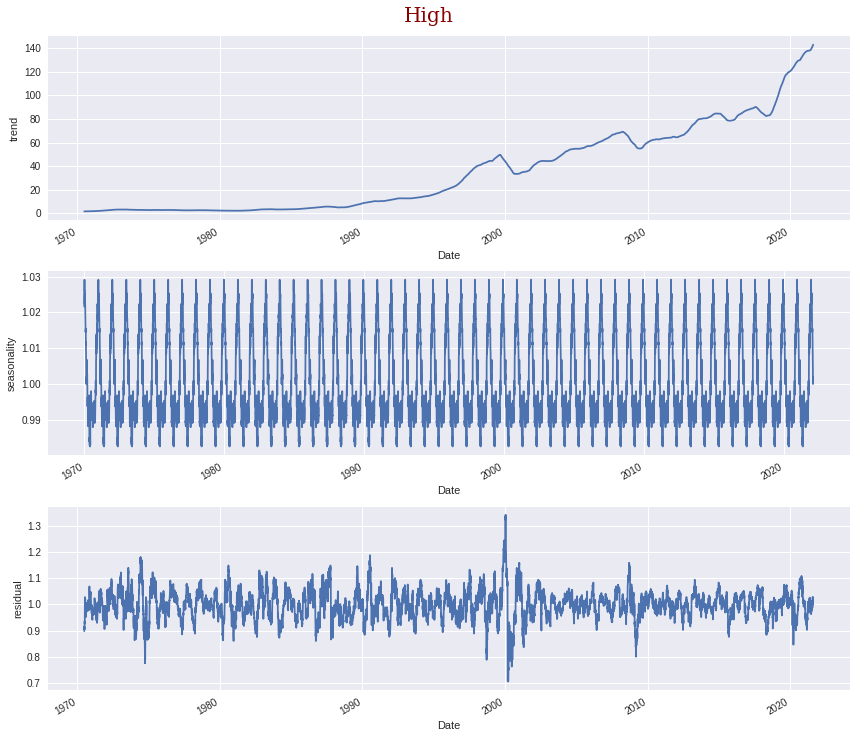

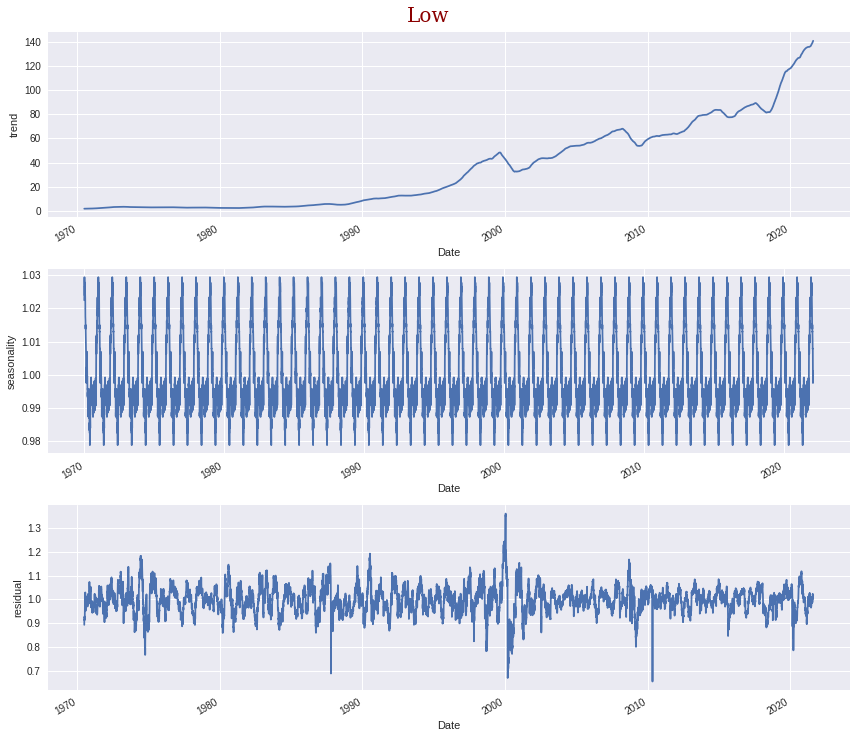

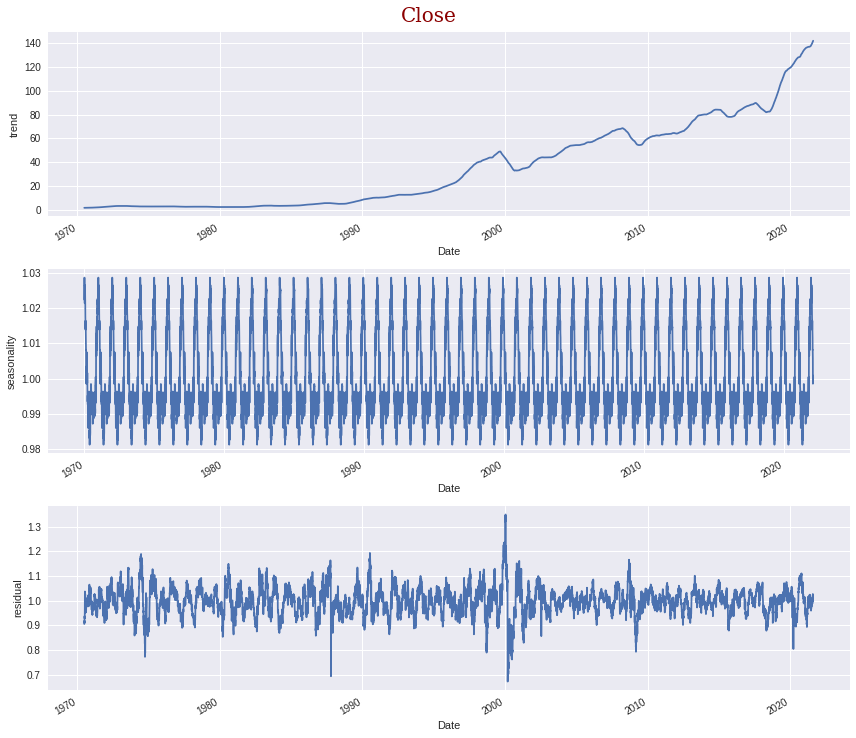

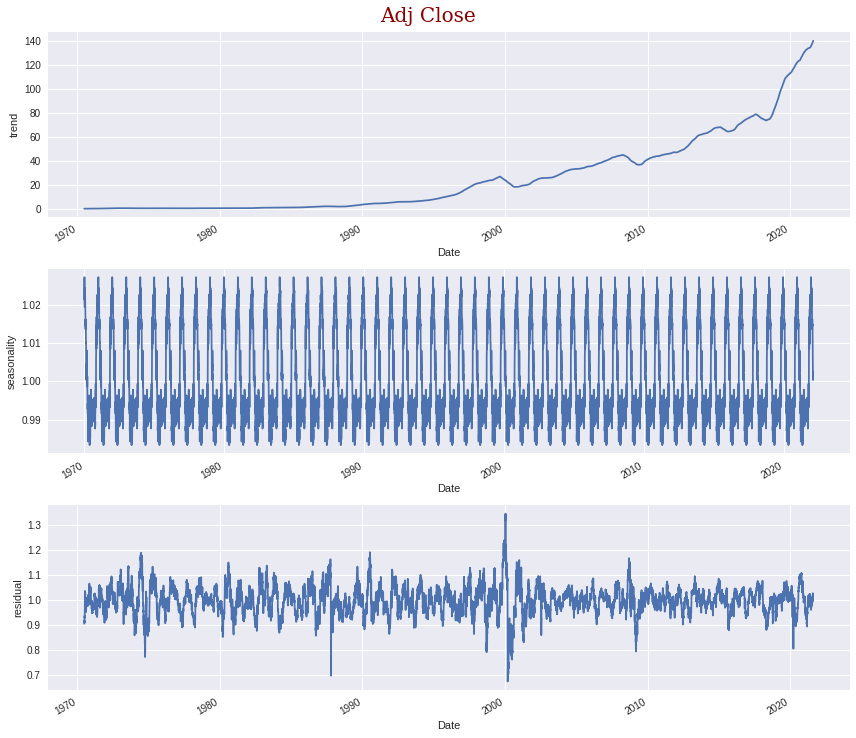

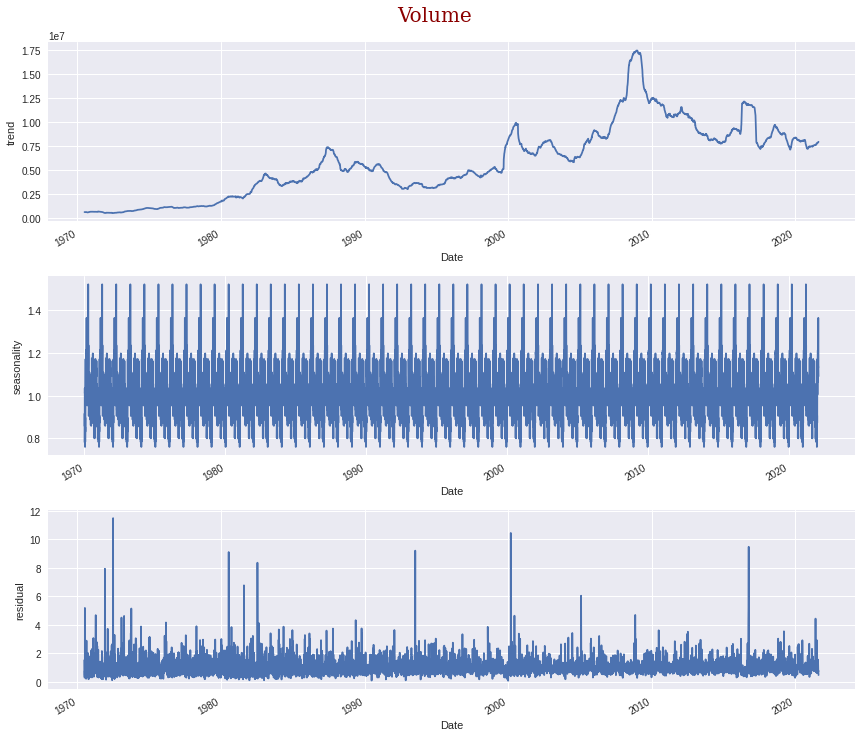

In [9]:
# Set robust to True to handle outliers
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

for i in columns:
    from statsmodels.tsa.seasonal import seasonal_decompose
    res = seasonal_decompose(df[i], model='multiplicative', period=252)
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,10))
    fig.suptitle(i, fontsize=20,  y=1.02, fontdict=font)
    res.trend.plot(ax=ax1, ylabel = "trend")
    res.seasonal.plot(ax=ax2, ylabel = "seasonality")
    res.resid.plot(ax=ax3, ylabel = "residual")
    plt.tight_layout()
    plt.show()
    print('\n \n')

# Detect seasonality

A Fourier transform (FT) is a mathematical transform that decomposes functions depending on space or time into functions depending on spatial frequency or temporal frequency. A fast Fourier transform (FFT) is algorithm that computes the discrete Fourier transform (DFT) of a sequence. It converts a signal from the original data, which is time for this case, to representation in the frequency domain. To put this into simpler term, Fourier transform takes a time-based data, measures every possible cycle, and return the overall “cycle recipe” (the amplitude, offset and rotation speed for every cycle that was found).

**Volume**

In [10]:
from kats.consts import TimeSeriesData
from kats.detectors.seasonality import FFTDetector


# Construct TimeSeriesData object
ts = pd.read_csv(file, parse_dates=['Date'])
ts.drop(ts.columns.difference(['Date', 'Volume']), 1, inplace=True)
ts = ts.rename(columns={'Date': 'time', 'Volume': 'value'})
ts = TimeSeriesData(ts)

fft_detector = FFTDetector(ts)
fft_detector.detector()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



{'seasonalities': [2629.0000000000005,
  1643.1250000000002,
  1095.4166666666667,
  773.2352941176472,
  571.5217391304349,
  453.2758620689656,
  355.2702702702703,
  320.609756097561,
  298.75,
  196.1940298507463,
  152.84883720930233,
  132.7777777777778,
  130.14851485148517,
  94.56834532374101,
  83.19620253164557],
 'seasonality_presence': True}

**Adj Close**

In [11]:
# Construct TimeSeriesData object

ts = pd.read_csv(file, parse_dates=['Date'])
ts.drop(ts.columns.difference(['Date', 'Adj Close']), 1, inplace=True)
ts = ts.rename(columns={'Date': 'time', 'Adj Close': 'value'})
ts = TimeSeriesData(ts)

fft_detector = FFTDetector(ts)
fft_detector.detector()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



{'seasonalities': [1877.8571428571431,
  1095.4166666666667,
  691.8421052631579,
  424.0322580645162,
  328.62500000000006,
  292.11111111111114,
  248.01886792452834],
 'seasonality_presence': True}

**Open / High / Low / Close**

These attributes have the same seasonality

In [12]:
# Construct TimeSeriesData object  
ts = pd.read_csv(file, parse_dates=['Date'])
ts.drop(ts.columns.difference(['Date', 'Close']), 1, inplace=True)
ts = ts.rename(columns={'Date': 'time', 'Close': 'value'})
ts = TimeSeriesData(ts)

fft_detector = FFTDetector(ts)
fft_detector.detector()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



{'seasonalities': [1877.8571428571431,
  1460.5555555555557,
  1095.4166666666667,
  691.8421052631579,
  424.0322580645162,
  328.62500000000006,
  305.69767441860466,
  248.01886792452834,
  239.00000000000003],
 'seasonality_presence': True}

# Differencing



Therefore, to get rid of the high autocorrelation and to make the process stationary, let’s take the first difference. We simply subtract the time series from itself with a lag of one day, and we get:

In [13]:
df_power_transformer

,Open,High,Low,Close,Adj Close,Volume
0,-1.481289,-1.481746,-1.477777,-1.478616,-1.537063,-1.412800
1,-1.478687,-1.479166,-1.477777,-1.476026,-1.535031,-1.705469
2,-1.477390,-1.481746,-1.478432,-1.478616,-1.537063,-1.749373
3,-1.477390,-1.472763,-1.473214,-1.469598,-1.529990,-1.515075
4,-1.469663,-1.465164,-1.466751,-1.463235,-1.525001,-1.691347
...,...,...,...,...,...,...
13140,1.713933,1.723563,1.717399,1.724724,1.755594,1.070887
13141,1.719962,1.721022,1.716294,1.711059,1.745020,0.859066
13142,1.713354,1.709370,1.707082,1.704655,1.740063,0.439994
13143,1.709398,1.704151,1.706976,1.702741,1.738581,0.158954


In [14]:
diff_period = 1
diff_series = df_power_transformer.diff(diff_period).dropna()

Let's pass the differenced dataframe into the adfuller method

In [15]:
from statsmodels.tsa.stattools import adfuller

columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for i in columns:
  adft = adfuller(diff_series[i], autolag='AIC')
  print(colored(i + ' (1st differencing)', 'red'))
  output_df_diff_series = pd.DataFrame({ 'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , 
                          'Metric':['Test Statistics','p-value','No. of lags used','Number of observations used', 
                                    'critical value (1%)', 'critical value (5%)', 'critical value (10%)']})
  print(output_df_diff_series )
  print('')

Open (1st differencing)
         Values                       Metric
0    -21.159351              Test Statistics
1      0.000000                      p-value
2     29.000000             No. of lags used
3  13114.000000  Number of observations used
4     -3.430849          critical value (1%)
5     -2.861760          critical value (5%)
6     -2.566887         critical value (10%)

High (1st differencing)
         Values                       Metric
0    -27.215415              Test Statistics
1      0.000000                      p-value
2     19.000000             No. of lags used
3  13124.000000  Number of observations used
4     -3.430848          critical value (1%)
5     -2.861760          critical value (5%)
6     -2.566887         critical value (10%)

Low (1st differencing)
         Values                       Metric
0    -55.950169              Test Statistics
1      0.000000                      p-value
2      4.000000             No. of lags used
3  13139.000000  Number of 

**Now, all the features are stationary**